### Topic modeling

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
clean_data= '/content/drive/MyDrive/Colab Notebooks/clean_dataset_oversample'
with open(clean_data, "r") as file:
    lines = file.readlines()
    
clean_full = [line.split() for line in lines]

In [4]:
import random
random.seed(3)
#on travaille avec un échantillon de 100000 tweets
clean_sample = random.sample(clean_full, 100000)
print(len(clean_sample))

100000


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from collections import Counter

In [6]:
#utiliser la méthode de Tfidfvectorizer avec:
""" le cleaning étant déjà fait on tuilise directement les données"""
vectorizer = TfidfVectorizer()
print('Tweet before vectorization: {}'.format(clean_sample[30]))


Tweet before vectorization: ['candidat', 'savoir', 'contrôler', 'verbalement', 'hurle', 'hystérique', 'désole', 'mélenchon', 'place', 'présidence', 'apprécier', 'partie', 'vulgaire', 'savoir', 'débattre']


In [7]:
X = vectorizer.fit_transform([' '.join(tweet) for tweet in clean_sample])
print('Tweet after vectorization: \n{}'.format(X[30]))
idf=vectorizer.idf_


Tweet after vectorization: 
  (0, 21626)	0.2559175008128213
  (0, 77278)	0.27858007986504185
  (0, 54288)	0.2099220265258795
  (0, 3937)	0.24523994263406992
  (0, 58824)	0.26374181859247176
  (0, 56257)	0.18533314561166103
  (0, 49414)	0.24811196942163566
  (0, 22675)	0.3336065356820625
  (0, 34175)	0.2377048636027949
  (0, 34022)	0.2947071129314193
  (0, 75902)	0.3512738998404348
  (0, 15964)	0.26374181859247176
  (0, 11087)	0.2262289491096449
  (0, 65746)	0.2973885872856305


In [8]:
#dictionnaire contenant les mots et leurs indice tfidf
dd=dict(zip(vectorizer.get_feature_names(), idf))
# trier le dictionnaire
l=sorted(dd, key=(dd).get)
#print(l)
#imprimer les extrimités du dictionnaire
print(l[0],l[-1])
print(dd['faire'])
print(dd['racisme'])  # faire est plus commun dans les tweets que racisme.

faire 𝚋𝚊𝚗𝚝ปมฟอล
3.3955879597932106
7.204667767519024


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


A- **LSA: Latent Semantic Analysis**

In [9]:
%%time
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(X)


CPU times: user 2.37 s, sys: 1.59 s, total: 3.96 s
Wall time: 2.15 s


In [10]:
print(lsa_top.shape)  # (no_of_doc*no_of_topics)


(100000, 10)


In [11]:
Sujets = 10
def sujet_important(model):
  sorted_words={}
  for i, comp in enumerate(model.components_):
    vocab_comp = zip(vocab, comp)# tuple (mot, valeur num)
    #list_tuple=list(vocab_comp)
    #print(list_tuple[50])
    sorted_words[i] = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
  return sorted_words
    



In [12]:
def print_important_word(sorted_words):
    for i in range(len(sorted_words)):
      print("Topic "+str(i)+": ")
      for t in sorted_words[i]:
          print(t[0],end=" ")
      print("\n")

In [13]:
# les mots les plus importants dans chaque sujet 
vocab = vectorizer.get_feature_names()
#for mot in vocab :print(mot,'\n')
#print(lsa_model.components_)
#sujet_important(lsa_model)
print_important_word(sujet_important(lsa_model))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic 0: 
aller faire bien voir sale pouvoir pute savoir vouloir falloir 

Topic 1: 
aller voir dormir espérer écouter mourir cours finir chercher loin 

Topic 2: 
bien voir aime pute sûr savoir vouloir femme sale gros 

Topic 3: 
pute fils sale gros voir mère fil petit merde savoir 

Topic 4: 
voir pouvoir femme vouloir savoir venir falloir tweet monde vie 

Topic 5: 
sale fou chien femme merd savoir con pouvoir fdp fraude 

Topic 6: 
femme pouvoir savoir vouloir aime homme vie falloir monde vrai 

Topic 7: 
femme aime homme faire bel vie voir sale aller bien 

Topic 8: 
pouvoir aime falloir comprendre passer bonjour france mettre croire prendre 

Topic 9: 
aime vouloir salope vie gros monde petit falloir genre bcp 



B- **LDA: Latent Dirichlet Allocation**

In [14]:
%%time
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics
lda_top=lda_model.fit_transform(X)

CPU times: user 1min 8s, sys: 368 ms, total: 1min 9s
Wall time: 1min 11s


In [15]:
#matrice de même taille que le lsa
print(lda_top.shape)  # (no_of_doc,no_of_topics)

(100000, 10)


In [16]:
# composition d'un tweet
print("Document 50: ")
for i,topic in enumerate(lda_top[50]):
  print("Topic ",i,": ",topic*100,"%")

Document 50: 
Topic  0 :  3.180197208685008 %
Topic  1 :  3.1799038336279293 %
Topic  2 :  3.180137289683423 %
Topic  3 :  3.1799171418611993 %
Topic  4 :  3.1798388259548678 %
Topic  5 :  3.1834848828951725 %
Topic  6 :  3.17978912726616 %
Topic  7 :  71.37704227708235 %
Topic  8 :  3.1797890227409664 %
Topic  9 :  3.179900390202929 %


Ici le tweet 50 appartiendrai au sujet numéro 7 (_+1) à 71%

In [17]:
print_important_word(sujet_important(lda_model))

Topic 0: 
bonjour femme année enfant devenir demande svp donner amour revenir 

Topic 1: 
pute question grand mère jour fort con point jsuis jeu 

Topic 2: 
tweet meilleur histoire mdrrr accord wsh entendre vidéo molina fille 

Topic 3: 
mds nuit veux sah pote ville soirée clairement triste bordel 

Topic 4: 
incroyable courage manger film monsieur fan jvai bitch arrête ilysm 

Topic 5: 
faire aller bien voir pouvoir vouloir savoir falloir sale pute 

Topic 6: 
aime ca pd frère excellent sale servir dollar rêve mentir 

Topic 7: 
salope ok twitter mourir covid faux faire bout rapport essayer 

Topic 8: 
vrai face psg défendre in follow is allah nn the 

Topic 9: 
space ouai jeune réel répondre pauvre mdrrrr projet recevoir heureux 



In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [19]:
# Générer un wordcloud pour chaque topic
def word_cloud_sujet(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

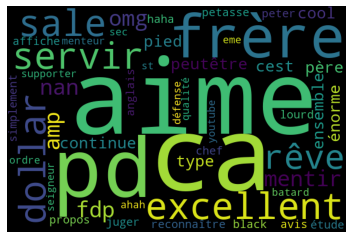

In [20]:
word_cloud_sujet(6)

**Reduction de dimentionnalité et visualisation**

In [22]:
%%time
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=1000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_top)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.370s...
[t-SNE] Computed neighbors for 100000 samples in 36.056s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional proba

In [23]:
sujets=10
# calcule la moyenne des vecteurs
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    retourne la liste des vecteurs centraux de chaque sujet 
    '''
    moy_topic_vectors = []
    for t in range(sujets):
        tweet_sujet = []
        for i in range(len(keys)):
            if keys[i] == t:
                tweet_sujet.append(two_dim_vectors[i])    
        tweet_sujet = np.vstack(tweet_sujet)
        moy_tweet_sujet = np.mean(tweet_sujet, axis=0)
        moy_topic_vectors.append(moy_tweet_sujet)
    return moy_topic_vectors

In [24]:
# fonction support
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

In [25]:
lsa_keys = get_keys(lsa_top)

In [26]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:sujets]


In [27]:
# Our main plotting package (must have explicit import of submodules)
import bokeh.io

# Enable viewing Bokeh plots in the notebook
bokeh.io.output_notebook()
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
top_words_lsa =sujet_important(lsa_model)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(sujets), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(sujets):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1])
    plot.add_layout(label)

show(plot)

def print_important_word(sorted_words):
    for i in range(len(sorted_words)):
      print("Topic "+str(i)+": ")
      for t in sorted_words[i]:
          print(t[0],end=" ")
      print("\n")

In [28]:
lda_keys = get_keys(lda_top)

In [29]:
%%time
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=1000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_top)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.179s...
[t-SNE] Computed neighbors for 100000 samples in 42.370s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional proba

In [30]:
top_words_lda = sujet_important(lda_model)

lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(sujets), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(sujets):
  for i in range(4):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1])
    plot.add_layout(label)

show(plot)

In [31]:
X=sujet_important(lsa_model)
for i in range(len(X)):
  print([y[0] for x, y in enumerate(X[i])])

['aller', 'faire', 'bien', 'voir', 'sale', 'pouvoir', 'pute', 'savoir', 'vouloir', 'falloir']
['aller', 'voir', 'dormir', 'espérer', 'écouter', 'mourir', 'cours', 'finir', 'chercher', 'loin']
['bien', 'voir', 'aime', 'pute', 'sûr', 'savoir', 'vouloir', 'femme', 'sale', 'gros']
['pute', 'fils', 'sale', 'gros', 'voir', 'mère', 'fil', 'petit', 'merde', 'savoir']
['voir', 'pouvoir', 'femme', 'vouloir', 'savoir', 'venir', 'falloir', 'tweet', 'monde', 'vie']
['sale', 'fou', 'chien', 'femme', 'merd', 'savoir', 'con', 'pouvoir', 'fdp', 'fraude']
['femme', 'pouvoir', 'savoir', 'vouloir', 'aime', 'homme', 'vie', 'falloir', 'monde', 'vrai']
['femme', 'aime', 'homme', 'faire', 'bel', 'vie', 'voir', 'sale', 'aller', 'bien']
['pouvoir', 'aime', 'falloir', 'comprendre', 'passer', 'bonjour', 'france', 'mettre', 'croire', 'prendre']
['aime', 'vouloir', 'salope', 'vie', 'gros', 'monde', 'petit', 'falloir', 'genre', 'bcp']


In [32]:
X=sujet_important(lda_model)
for i in range(len(X)):
  print([y[0] for x, y in enumerate(X[i])])

['bonjour', 'femme', 'année', 'enfant', 'devenir', 'demande', 'svp', 'donner', 'amour', 'revenir']
['pute', 'question', 'grand', 'mère', 'jour', 'fort', 'con', 'point', 'jsuis', 'jeu']
['tweet', 'meilleur', 'histoire', 'mdrrr', 'accord', 'wsh', 'entendre', 'vidéo', 'molina', 'fille']
['mds', 'nuit', 'veux', 'sah', 'pote', 'ville', 'soirée', 'clairement', 'triste', 'bordel']
['incroyable', 'courage', 'manger', 'film', 'monsieur', 'fan', 'jvai', 'bitch', 'arrête', 'ilysm']
['faire', 'aller', 'bien', 'voir', 'pouvoir', 'vouloir', 'savoir', 'falloir', 'sale', 'pute']
['aime', 'ca', 'pd', 'frère', 'excellent', 'sale', 'servir', 'dollar', 'rêve', 'mentir']
['salope', 'ok', 'twitter', 'mourir', 'covid', 'faux', 'faire', 'bout', 'rapport', 'essayer']
['vrai', 'face', 'psg', 'défendre', 'in', 'follow', 'is', 'allah', 'nn', 'the']
['space', 'ouai', 'jeune', 'réel', 'répondre', 'pauvre', 'mdrrrr', 'projet', 'recevoir', 'heureux']
